In [23]:
import pandas as pd
file_path = "movies.csv"
df = pd.read_csv(file_path)
shape = df.shape
print("Shape of 'movies.csv':", shape)


Shape of 'movies.csv': (9742, 3)


In [24]:
import pandas as pd
file_path = "ratings.csv"
df = pd.read_csv(file_path)
shape = df.shape
print("Shape of 'ratings.csv':", shape)


Shape of 'ratings.csv': (100836, 4)


In [25]:
import pandas as pd
file_path = "ratings.csv"
df = pd.read_csv(file_path)
unique_user_ids = df['userId'].nunique()
print("Number of unique userId values in 'ratings.csv':", unique_user_ids)


Number of unique userId values in 'ratings.csv': 610


In [26]:
import pandas as pd

ratings_path = "ratings.csv"
movies_path = "movies.csv"

ratings_df = pd.read_csv(ratings_path)
movies_df = pd.read_csv(movies_path)

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

movie_ratings_count = merged_df.groupby('title')['rating'].count()

max_rated_movie = movie_ratings_count.idxmax()

# Print the result
print("Movie with the maximum number of user ratings:", max_rated_movie)


Movie with the maximum number of user ratings: Forrest Gump (1994)


In [27]:
import pandas as pd

tags_file_path = "tags.csv"

tags_df = pd.read_csv(tags_file_path)

matrix_tags = tags_df[tags_df['movieId'].isin(movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'])]

print("Tags for 'Matrix, The (1999)':")
print(matrix_tags['tag'].unique())


Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [31]:
import pandas as pd

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

terminator_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]

average_rating = terminator_ratings['rating'].mean()

print("Average rating for 'Terminator 2: Judgment Day (1991)':", average_rating)


Average rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


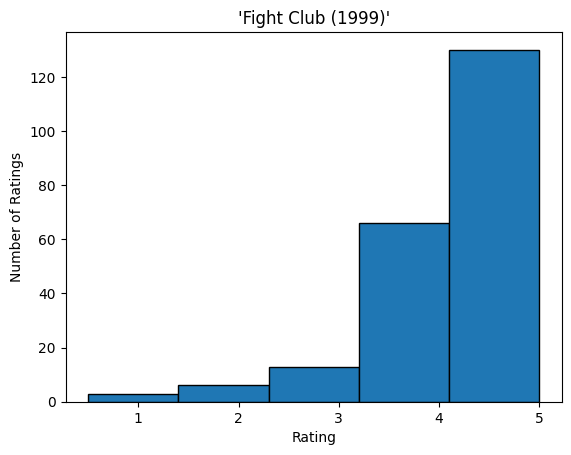

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

fight_club_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]

fight_club_ratings = ratings[ratings['movieId'] == fight_club_id]

plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.title("'Fight Club (1999)'")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()


In [42]:
import pandas as pd

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

movie_ratings_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

merged_data = pd.merge(movies, movie_ratings_stats, left_on='movieId', right_index=True)

# Filter movies with more than 50 user ratings
popular_movies = merged_data[merged_data['count'] > 50]

# Find the movie with the highest average rating
most_popular_movie = popular_movies.loc[popular_movies['mean'].idxmax()]

print("The most popular movie based on average user ratings is:", most_popular_movie['title'])

The most popular movie based on average user ratings is: Shawshank Redemption, The (1994)


In [46]:
import pandas as pd

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

ratings_count = ratings.groupby('movieId')['rating'].count()
merged_data = pd.merge(movies, ratings_count, left_on='movieId', right_index=True, suffixes=('_movies', '_ratings'))
popular_movies = merged_data[merged_data['rating'] > 50]
top_5_movies = popular_movies.nlargest(5, 'rating')

print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movies['title'])


Top 5 popular movies based on the number of user ratings:
314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1939                  Matrix, The (1999)
Name: title, dtype: object


In [48]:
import pandas as pd

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

ratings_count = ratings.groupby('movieId')['rating'].count()
merged_data = pd.merge(movies, ratings_count, left_on='movieId', right_index=True, suffixes=('_movies', '_ratings'))

sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]

third_most_popular_sci_fi_movie = sci_fi_movies.nlargest(3, 'rating')['title'].iloc[-1]

print("The third most popular Sci-Fi movie based on the number of user ratings is:", third_most_popular_sci_fi_movie)


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)


In [49]:
import pandas as pd
links_df = pd.read_csv("links.csv")
highest_imdb_movie_id = links_df.loc[links_df['imdbId'].idxmax()]['movieId']

print("The movieId of the movie with the highest IMDB rating is:", highest_imdb_movie_id)


The movieId of the movie with the highest IMDB rating is: 193587.0


In [53]:
import pandas as pd

links_path = "links.csv"
movies_path = "movies.csv"

links = pd.read_csv(links_path)
movies = pd.read_csv(movies_path)

merged_data = pd.merge(links, movies, on='movieId')

sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi', case=False, na=False)]

highest_imdb_sci_fi_movie_id = sci_fi_movies.loc[sci_fi_movies['imdbId'].idxmax()]['movieId']

print("The movieId of the Sci-Fi movie with the highest IMDB rating is:", highest_imdb_sci_fi_movie_id)


The movieId of the Sci-Fi movie with the highest IMDB rating is: 179053
